<a href="https://colab.research.google.com/github/rayannegsilva/codigo-tcc/blob/main/TCC_Codigo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import de bibliotecas

In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download("book")
nltk.download('punkt')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [3]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.8 MB/s eta 0:00:00


In [4]:
import csv
import pandas as pd
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import statistics
import os
from unidecode import unidecode
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Base do Anew
anew = pd.read_csv('/content/drive/MyDrive/dataset/EnglishShortened.csv')
vad = pd.read_csv('/content/drive/MyDrive/dataset/vad.csv')


# Datagrama Taylor Swift
taylorswift = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/01-taylor_swift.csv')
fearless = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/02-fearless_(taylor_version).csv')
speaknow = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/03-speak_now_(taylor_version).csv')
red = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/04-red_(taylor_version).csv')
ts1989 = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/05-1989_(taylors_version).csv')
reputation = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/06-reputation.csv')
lover = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/07-lover.csv')
folklore = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/08-folklore_(deluxe_edition).csv')
evermore = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/09-evermore_(deluxe_edition).csv')
midnights = pd.read_csv('/content/drive/MyDrive/dataset/scrapy/10-midnights_(the_til_dawn_edition).csv')

#Dtagrama Travis
rodeo = pd.read_csv('/content/drive/MyDrive/dataset/travis/01-rodeo.csv')
utopia = pd.read_csv('/content/drive/MyDrive/dataset/travis/02-utopia.csv')
astroworld = pd.read_csv('/content/drive/MyDrive/dataset/travis/03-astroworld.csv')
birds = pd.read_csv('/content/drive/MyDrive/dataset/travis/04-birds_in_the_trap.csv')


#Eminem
musictobe = pd.read_csv('/content/drive/MyDrive/dataset/nickminaj/01-music_to_be.csv')
thebook = pd.read_csv('/content/drive/MyDrive/dataset/nickminaj/01-the_book_of_souls.csv')
eternity = pd.read_csv('/content/drive/MyDrive/dataset/nickminaj/01-eternity.csv')


# caminhos das saídas
output = '/content/drive/MyDrive/dataset/vadoutput'
outputToken = '/content/drive/MyDrive/dataset/token'
countOutput = '/content/drive/MyDrive/dataset/count'

In [7]:
red

,album_name,track_title,track_n,lyric,line
0,red (taylor version),State Of Grace,1,I'm walking fast through the traffic lights,1
1,red (taylor version),State Of Grace,1,Busy streets and busy lives,2
2,red (taylor version),State Of Grace,1,And all we know,3
3,red (taylor version),State Of Grace,1,Is touch and go,4
4,red (taylor version),State Of Grace,1,We are alone with our changing minds,5
...,...,...,...,...,...
1561,red (taylor version),The Very First Night,29,I miss you like it was the very first night,51
1562,red (taylor version),The Very First Night,29,"Take me away, take me away",52
1563,red (taylor version),The Very First Night,29,"Take me away to you, to you",53
1564,red (taylor version),The Very First Night,29,"Take me away, take me away",54


# Pre-processamento

In [ ]:
# Retira símbolos e coloca as letras em minúsculo

def clean_function(df, column_text):
    contraction_patterns = {
        r'\bgonna\b': 'going to',
        r'\bwanna\b': 'want to',
    }
    for pattern, replacement in contraction_patterns.items():
        df[column_text] = df[column_text].str.replace(pattern, replacement, regex=True)
    df[column_text] = df[column_text]\
        .apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x) if isinstance(x, str) else x)\
        .apply(lambda x: unidecode(x.lower()) if isinstance(x, str) else x)
    return df

# Remove Stopwords
def stop_words_function(df, column_name):
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ["oh", "woah", 	"yeah", "im", 'grrah', "ooh", "woo", "ah", "ha", "whoa", "ayy", "eeh", "mmm", "mm"]
    stop_words.update(additional_stop_words)
    df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]) if isinstance(x, str) else x)
    return df

# Lemmatiza
def lemmatize_with_pos_tag(df, column_name):
    lemmatizer = WordNetLemmatizer()
    df[column_name] = df[column_name].apply(lambda x: [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tag(word_tokenize(x))])
    df[column_name] = df[column_name].apply(lambda x: ' '.join(x))
    return df

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

# Separa a coluna lyric em tokens
def split_lyric_column(dataframe):
    dataframe['lyric'] = dataframe['lyric'].str.split()
    dataframe = dataframe.explode('lyric')
    dataframe.reset_index(drop=True, inplace=True)
    dataframe = dataframe[dataframe['lyric'].notna() & (dataframe['lyric'] != '')]
    return dataframe

In [ ]:
# Função de limpeza
def preprocess_data(df, column_name):
    df = clean_function(df, column_name)
    df = stop_words_function(df, column_name)
    df = lemmatize_with_pos_tag(df, column_name)
    df = split_lyric_column(df)
    df = df[df['lyric'].notna() & (df['lyric'] != '')]
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
taylorswift = preprocess_data(taylorswift, 'lyric')
fearless = preprocess_data(fearless, 'lyric')
speaknow = preprocess_data(speaknow, 'lyric')
red = preprocess_data(red, 'lyric')
ts1989 = preprocess_data(ts1989, 'lyric')
reputation = preprocess_data(reputation, 'lyric')
lover = preprocess_data(lover, 'lyric')
folklore = preprocess_data(folklore, 'lyric')
evermore = preprocess_data(evermore, 'lyric')
midnights = preprocess_data(midnights, 'lyric')

# Categorizando emoções

In [ ]:
def categorize_emotionVad(arousal, valence):
    points = {
        "alert": (0.6, 0.9), "excited": (0.7, 0.8), "elated": (0.8, 0.7), "happy": (0.9, 0.6),
        "contented": (0.9, 0.4), "serene": (0.8, 0.3), "relaxed": (0.7, 0.2), "calm": (0.6, 0.1),
        "bored": (0.4, 0.1), "depressed": (0.3, 0.2), "unhappy": (0.2, 0.3), "sad": (0.1, 0.4),
        "upset": (0.1, 0.6), "stressed": (0.2, 0.7), "nervous": (0.3, 0.8), "tense": (0.4, 0.9)
    }

    distances = {key: ((valence - x) ** 2 + (arousal - y) ** 2) ** 0.5 for key, (x, y) in points.items()}
    closest_point = min(distances, key=distances.get)
    category = ""

    if closest_point in ["alert", "excited", "elated", "happy"]:
        category = "Happy"
    elif closest_point in ["contented", "serene", "relaxed", "calm"]:
        category = "Relaxed"
    elif closest_point in ["bored", "depressed", "unhappy", "sad"]:
        category = "Sad"
    elif closest_point in ["upset", "stressed", "nervous", "tense"]:
        category = "Angry"

    return category, closest_point

In [ ]:
def analyze_lyric(row, vad_dict, writer, i):
    lyric = row.lyric
    album_name = row.album_name
    track_title = row.track_title

    v_list = []
    a_list = []
    d_list = []
    all_words = []
    found_words = []

    if isinstance(lyric, list):
        for word in lyric:
            lemma = str(word).casefold()
            all_words.append(lemma)

            if lemma in vad_dict:
                anew_row = vad_dict[lemma]
                found_words.append(lemma)
                v = float(anew_row['valence'])
                a = float(anew_row['arousal'])
                d = float(anew_row['dominance'])

                v_list.append(v)
                a_list.append(a)
                d_list.append(d)

    else:
        lemma = str(lyric).casefold()
        all_words.append(lemma)

        if lemma in vad_dict:
            anew_row = vad_dict[lemma]
            found_words.append(lemma)
            v = float(anew_row['valence'])
            a = float(anew_row['arousal'])
            d = float(anew_row['dominance'])

            v_list.append(v)
            a_list.append(a)
            d_list.append(d)

    if len(found_words) == 0:
        writer.writerow({
            'Sentence ID': i,
            'Album Name': album_name,
            'Track Title': track_title,
            'Sentence': lyric if isinstance(lyric, str) else ' '.join(lyric) if (isinstance(lyric, list) and len(lyric) > 0) else 'N/A',
            'Valence': 'N/A',
            'Arousal': 'N/A',
            'Dominance': 'N/A',
            'Quadrant': 'N/A',
            'Sentiment': 'N/A',
            '# Words Found': 0,
            'Found Words': 'N/A',
            'All Words': all_words
        })
    else:
        valence = (v_list)
        arousal = (a_list)
        dominance = (d_list)

        category, closest_point = categorize_emotionVad(arousal, valence)

        writer.writerow({
            'Sentence ID': i,
            'Album Name': album_name,
            'Track Title': track_title,
            'Sentence': lyric if isinstance(lyric, str) else ' '.join(lyric),
            'Valence': valence,
            'Arousal': arousal,
            'Dominance': dominance,
            'Quadrant': category,
            'Sentiment': closest_point,
            '# Words Found': len(found_words),
            'Found Words': found_words,
            'All Words': all_words
        })

def russel_analy(df, out_dir, anew):
    out_file = os.path.join(out_dir, "01-the_party(token)_ album.csv")

    if df.empty:
        print('Empty DataFrame.')
        return

    vad_dict = anew.set_index('Word').to_dict(orient='index')

    with open(out_file, 'w', newline='') as csvfile:
        fieldnames = ['Sentence ID', 'Album Name', 'Track Title', 'Sentence', 'Valence', 'Arousal', 'Dominance', 'Quadrant', 'Sentiment',
                      '# Words Found', 'Found Words', 'All Words']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for i, row in enumerate(df.itertuples(), start=1):
            analyze_lyric(row, vad_dict, writer, i)


In [ ]:
russel_analy(party, output, vad)

# Album Count

In [ ]:
# Datagrama Taylor Swift
taylorswift_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/01-taylor_swift(token)_ album.csv')
fearless_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/02-fearless(token)_ album.csv')
speaknow_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/03-speak_now(token)_ album.csv')
red_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/04-red(token)_ album.csv')
ts1989_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/05-1989(token)_ album.csv')
reputation_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/06-reputation(token)_ album.csv')
lover_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/07-lover(token)_ album.csv')
folklore_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/08-folklore(token)_ album.csv')
evermore_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/09-evermore(token)_ album.csv')
midnights_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/10-midnights(token)_ album.csv')


borntobe_token = pd.read_csv('/content/drive/MyDrive/dataset/vadoutput/02-music_to_be(token)_ album.csv')

In [ ]:
borntobe_token

,Sentence ID,Album Name,Track Title,Sentence,Valence,Arousal,Dominance,Quadrant,Sentiment,# Words Found,Found Words,All Words
0,1,music to be,Premonition (Intro),eminem,NaN,NaN,NaN,NaN,NaN,0,NaN,['eminem']
1,2,music to be,Premonition (Intro),guess,0.640,0.463,0.442,Relaxed,serene,1,['guess'],['guess']
2,3,music to be,Premonition (Intro),huh,NaN,NaN,NaN,NaN,NaN,0,NaN,['huh']
3,4,music to be,Premonition (Intro),think,0.786,0.408,0.618,Relaxed,serene,1,['think'],['think']
4,5,music to be,Premonition (Intro),obvious,0.625,0.336,0.585,Relaxed,relaxed,1,['obvious'],['obvious']
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,6993,music to be,Alfred (Outro),luck,0.854,0.490,0.717,Relaxed,contented,1,['luck'],['luck']
6993,6994,music to be,Alfred (Outro),next,NaN,NaN,NaN,NaN,NaN,0,NaN,['next']
6994,6995,music to be,Alfred (Outro),time,0.604,0.288,0.609,Relaxed,relaxed,1,['time'],['time']
6995,6996,music to be,Alfred (Outro),goodnight,NaN,NaN,NaN,NaN,NaN,0,NaN,['goodnight']


In [ ]:
columns_df = ["id", "album_name", "track_title", "number_lines", "alert", "excited", "elated", "happy", "contented", "serene", "relaxed", "calm", "bored", "depressed", "unhappy", "sad", "upset", "stressed", "nervous", "tense", "n/a"]
sentiment_albuns = pd.DataFrame(columns=columns_df)

sentiment_counts_dict = {}

for index, row in borntobe_token.iterrows():
    song_name = row["Track Title"]
    sentiment = row["Sentiment"]

    # Verifique se a música já existe no dicionário
    if song_name not in sentiment_counts_dict:
        sentiment_counts_dict[song_name] = {"id": len(sentiment_counts_dict) + 1, "album_name": "", "track_title": song_name, "number_lines": 0, "n/a": 0}

    # A música já existe, então atualize a contagem de sentimentos (pulando se já foi contado)
    if pd.isna(sentiment):
        sentiment_counts_dict[song_name]["n/a"] += 1
    else:
        sentiment_counts_dict[song_name][sentiment] = sentiment_counts_dict[song_name].get(sentiment, 0) + 1

# Preencha o DataFrame "sentiment_albuns" com os dados apropriados
for song_name, sentiment_counts in sentiment_counts_dict.items():
    album_name = borntobe_token[borntobe_token["Track Title"] == song_name]["Album Name"].iloc[0]
    number_lines = borntobe_token[borntobe_token["Track Title"] == song_name].shape[0]

    # Atualize as informações no dicionário
    sentiment_counts["album_name"] = album_name
    sentiment_counts["number_lines"] = number_lines

    # Adicione a nova linha ao DataFrame
    sentiment_albuns = sentiment_albuns.append(sentiment_counts, ignore_index=True)

# Preencha os valores NaN com zero
sentiment_albuns = sentiment_albuns.fillna(0)

# Salve o DataFrame em um arquivo CSV
sentiment_albuns.to_csv("sentiment_albuns.csv", index=False)

<ipython-input-19-76a33ef19476>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_albuns = sentiment_albuns.append(sentiment_counts, ignore_index=True)
<ipython-input-19-76a33ef19476>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_albuns = sentiment_albuns.append(sentiment_counts, ignore_index=True)
<ipython-input-19-76a33ef19476>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_albuns = sentiment_albuns.append(sentiment_counts, ignore_index=True)
<ipython-input-19-76a33ef19476>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_albuns = sentiment_albuns.append(sentiment_counts, ignore_index=Tr

In [ ]:
# sentiment_albuns.to_csv("/content/drive/MyDrive/dataset/count/02-borntobe_count.csv", index=False)

In [ ]:
sentiment_albuns

,id,album_name,track_title,number_lines,alert,excited,elated,happy,contented,serene,...,calm,bored,depressed,unhappy,sad,upset,stressed,nervous,tense,n/a
0,1,music to be,Premonition (Intro),287,0,6,33,12,8,26,...,13,3,17,5,3,16,14,14,0,72
1,2,music to be,Unaccommodating (feat. Young M.A),512,2,19,27,19,9,58,...,32,8,35,19,5,17,33,32,3,144
2,3,music to be,You Gon' Learn (feat. Royce Da 5'9'' & White G...,503,1,5,65,23,5,47,...,8,18,27,10,4,22,23,28,4,147
3,4,music to be,Alfred (Interlude),18,0,0,0,4,2,2,...,1,0,1,1,0,0,2,1,0,3
4,5,music to be,Those Kinda Nights (feat. Ed Sheeran),342,2,5,37,11,11,39,...,3,8,17,7,10,2,11,16,0,114
5,6,music to be,In Too Deep,253,0,5,19,19,4,30,...,9,4,16,2,5,3,6,10,1,89
6,7,music to be,Godzilla (feat. Juice WRLD),527,1,17,44,11,9,64,...,13,19,39,17,7,14,30,50,2,145
7,8,music to be,Darkness,367,0,18,35,5,12,52,...,9,3,32,11,2,18,16,22,4,87
8,9,music to be,Leaving Heaven (feat. Skylar Grey),466,5,8,35,25,21,51,...,20,4,45,14,8,12,23,25,3,101
9,10,music to be,"Yah Yah (feat. Royce 5'9"", Black Thought & Q-Tip)",608,5,27,41,22,12,77,...,11,7,29,12,4,7,30,24,2,231


# Artist Count

In [ ]:
taylorswift_count = pd.read_csv('/content/drive/MyDrive/dataset/count/01-taylor-swift_count.csv')
fearless_count = pd.read_csv('/content/drive/MyDrive/dataset/count/02-fearless_count.csv')
speaknow_count = pd.read_csv('/content/drive/MyDrive/dataset/count/03-speak_now_count.csv')
red_count = pd.read_csv('/content/drive/MyDrive/dataset/count/04-red_count.csv')
ts1989_count = pd.read_csv('/content/drive/MyDrive/dataset/count/05-1989_count.csv')
reputation_count = pd.read_csv('/content/drive/MyDrive/dataset/count/06-reputation_count.csv')
lover_count = pd.read_csv('/content/drive/MyDrive/dataset/count/07-lover_count.csv')
folklore_count = pd.read_csv('/content/drive/MyDrive/dataset/count/08-folklore_count.csv')
evermore_count = pd.read_csv('/content/drive/MyDrive/dataset/count/09-evermore_count.csv')
midnights_count = pd.read_csv('/content/drive/MyDrive/dataset/count/10-midnights_count.csv')

In [ ]:
albums = [taylorswift_count, fearless_count, speaknow_count, red_count, ts1989_count, reputation_count, lover_count, folklore_count, evermore_count, midnights_count]

columns_albums_df = ["id", "album_name", "number_lines", "alert", "excited", "elated", "happy", "contented", "serene", "relaxed", "calm", "bored", "depressed", "unhappy", "sad", "upset", "stressed", "nervous", "tense", "n/a"]
consolidated_df = pd.DataFrame(columns=columns_albums_df)
for i, album_df in enumerate(albums):
    album_name = album_df.iloc[0]["album_name"]
    album_data = album_df[album_df["album_name"] == album_name]


    album_sum = album_data[columns_albums_df[2:]].sum()


    consolidated_row = {"id": i + 1, "album_name": album_name}
    consolidated_row.update(album_sum.to_dict())
    consolidated_row["number_lines"] = album_data["number_lines"].sum()
    consolidated_row["n/a"] = album_data["n/a"].sum()
    consolidated_df = consolidated_df.append(consolidated_row, ignore_index=True)


consolidated_df.to_csv("/content/drive/MyDrive/dataset/output/taylor_albuns_count.csv", index=False)

<ipython-input-22-65fcb5c29f92>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_df = consolidated_df.append(consolidated_row, ignore_index=True)
<ipython-input-22-65fcb5c29f92>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_df = consolidated_df.append(consolidated_row, ignore_index=True)
<ipython-input-22-65fcb5c29f92>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_df = consolidated_df.append(consolidated_row, ignore_index=True)
<ipython-input-22-65fcb5c29f92>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_df = consolidated_df.append(consolidated_row, ignore_index=True)
<ipy

# Contagem de palavras

In [ ]:
def process_csv(df):
    df_filtered = df.dropna(subset=['Valence', 'Arousal'])

    word_counts = {}
    for words_list, sentiment in zip(df_filtered['Found Words'], df_filtered['Sentiment']):
        unique_words = set(eval(words_list))
        for word in unique_words:
            word_counts[word] = {'occurrences': word_counts.get(word, {}).get('occurrences', 0) + 1, 'sentiment': sentiment}

    word_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
    word_df.rename(columns={'index': 'word'}, inplace=True)
    word_df = word_df.sort_values(by='occurrences', ascending=False).reset_index(drop=True)

    return word_df

In [ ]:
borntobe_words = process_csv(borntobe_token)

In [ ]:
borntobe_words

,word,occurrences,sentiment
0,like,189,serene
1,get,157,elated
2,go,101,relaxed
3,cause,82,depressed
4,say,77,relaxed
...,...,...,...
1638,triumphant,1,elated
1639,legacy,1,happy
1640,leg,1,relaxed
1641,bunch,1,relaxed


In [ ]:
taylorwords = process_csv(red_token)

In [ ]:
def plot_top_words_with_sentiment(word_df, top_n=10):
    top_words = word_df.head(top_n)

    # Definindo os sentimentos disponíveis
    points = {
        "alert": '#7FFF7F', "excited": '#7F7FFF', "elated": '#4CB944', "happy": '#FFDF64',
        "contented": '#FFBF7F', "serene": '#957186', "relaxed": '#46ACC2', "calm": '#7FFFBD',
        "bored": '#FF7F7F', "depressed": '#545F66', "unhappy": '#FF6347', "sad": '#BEBEBE',
        "upset": '#556B2F', "stressed": '#008080', "nervous": '#668cff', "tense": '#800000'
    }

    available_sentiments = set(top_words['sentiment'])

    # Mapeando os sentimentos disponíveis para cores
    sentiment_colors = {
        sentiment: color for sentiment, color in points.items() if sentiment in available_sentiments
    }

    plt.figure(figsize=(10, 6))
    handles = []  # Para armazenar os handles da legenda
    for i, (word, occurrences, sentiment) in enumerate(zip(top_words['word'], top_words['occurrences'], top_words['sentiment'])):
        color = sentiment_colors.get(sentiment.lower(), 'gray')
        handles.append(plt.barh(i, occurrences, color=color))
        plt.text(occurrences / 2, i, f'{occurrences}', ha='center', va='center', color='black', fontsize=8)
        plt.text(occurrences + 0.1, i, f'{word}', ha='left', va='center', color='black', fontsize=8)

    # Criando a legenda para os sentimentos disponíveis
    legend_labels = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sentiment_colors.values()]
    legend_labels_text = [sentiment for sentiment in sentiment_colors.keys()]
    plt.legend(legend_labels, legend_labels_text, loc='lower right')

    plt.xlabel('Ocorrências')
    plt.title('Palavras mais recorrentes no álbum Red de Taylor Swift')
    plt.yticks(range(len(top_words)), [])  # Remover os ticks do eixo y
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('ocorrencia_red.png')
    plt.show()

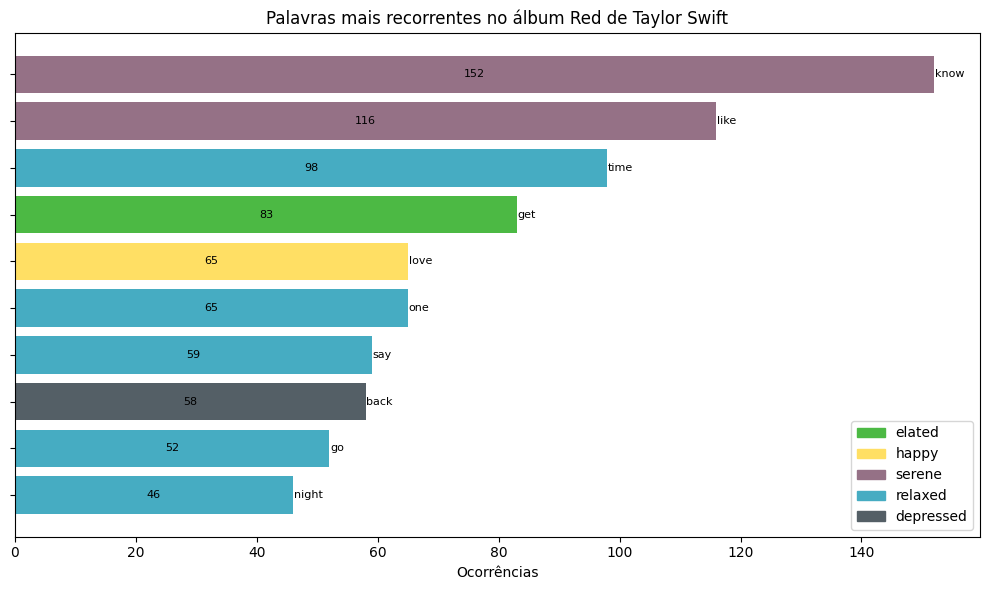

In [ ]:
plot_top_words_with_sentiment(taylorwords)

# Visualização

In [ ]:
taylor_count = pd.read_csv('/content/drive/MyDrive/dataset/output/taylor_albuns_count.csv')

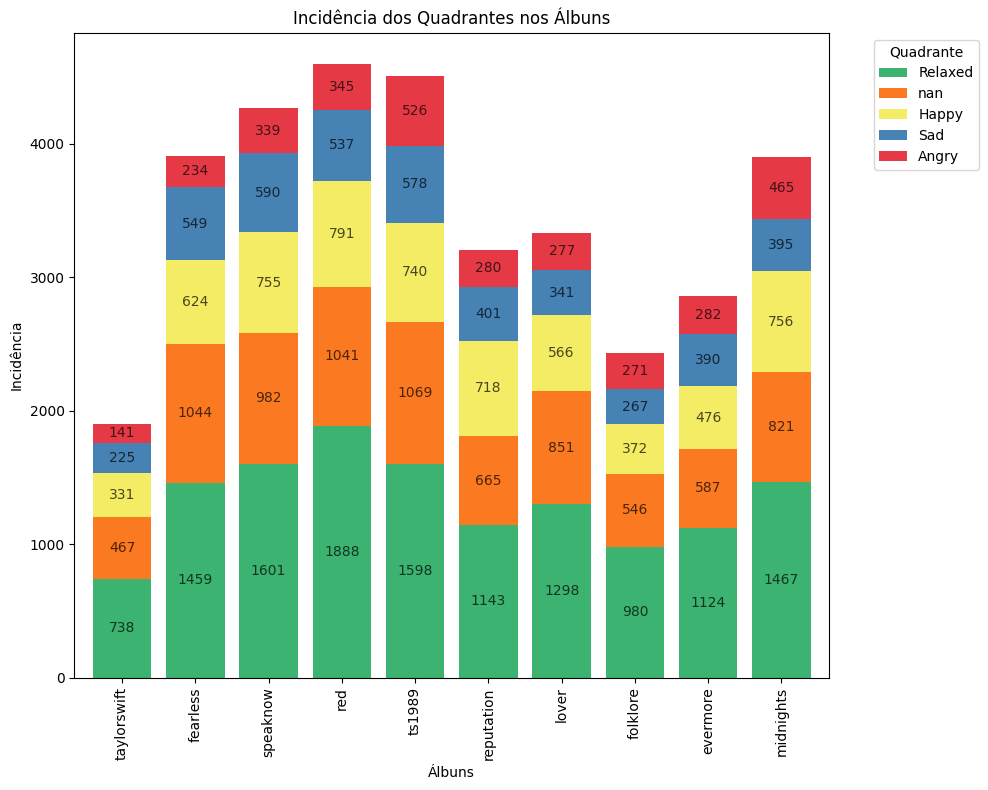

In [ ]:
dataframes = [taylorswift_token, fearless_token, speaknow_token, red_token, ts1989_token, reputation_token, lover_token, folklore_token, evermore_token, midnights_token]
nomes_dataframes = ["taylorswift", "fearless", "speaknow", "red", "ts1989", "reputation", "lover", "folklore", "evermore", "midnights"]

incidences = []

for nome, df in zip(nomes_dataframes, dataframes):
    incidence = df['Quadrant'].value_counts(dropna=False)
    incidence = incidence.rename(nome)
    incidences.append(incidence)

result = pd.concat(incidences, axis=1)

if pd.NA in result.columns:
    cols = list(result.columns)
    cols.remove(pd.NA)
    cols.append(pd.NA)
    result = result[cols]

result = result.fillna(0).astype(int)

legend_colors = ['mediumseagreen', '#FA7921', '#F5EC66', 'steelblue', '#E63946']


ax = result.T.plot(kind='bar', stacked=True, width=0.8, color=legend_colors)

# Ajustar os ticks do eixo x para controlar o espaçamento entre as barras
ticks_positions = [i for i in range(len(result.columns))]
plt.xticks(ticks_positions, result.columns)

plt.xlabel('Álbuns')
plt.ylabel('Incidência')
plt.title('Incidência dos Quadrantes nos Álbuns')

plt.legend(title='Quadrante',  bbox_to_anchor=(1.05, 1), loc='upper left', labels=result.index)

# Adicionar os números de incidência mais centralizados dentro das barras
for bar in ax.containers:
    ax.bar_label(bar, label_type='center', padding=0, alpha=0.7)

plt.rcParams['figure.figsize'] = (10, 8)
plt.tight_layout()
plt.savefig('incidencia_quadrantes.png')
plt.show()


In [ ]:
borntobe_token

,Sentence ID,Album Name,Track Title,Sentence,Valence,Arousal,Dominance,Quadrant,Sentiment,# Words Found,Found Words,All Words
0,1,music to be,Premonition (Intro),eminem,NaN,NaN,NaN,NaN,NaN,0,NaN,['eminem']
1,2,music to be,Premonition (Intro),guess,0.640,0.463,0.442,Relaxed,serene,1,['guess'],['guess']
2,3,music to be,Premonition (Intro),huh,NaN,NaN,NaN,NaN,NaN,0,NaN,['huh']
3,4,music to be,Premonition (Intro),think,0.786,0.408,0.618,Relaxed,serene,1,['think'],['think']
4,5,music to be,Premonition (Intro),obvious,0.625,0.336,0.585,Relaxed,relaxed,1,['obvious'],['obvious']
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,6993,music to be,Alfred (Outro),luck,0.854,0.490,0.717,Relaxed,contented,1,['luck'],['luck']
6993,6994,music to be,Alfred (Outro),next,NaN,NaN,NaN,NaN,NaN,0,NaN,['next']
6994,6995,music to be,Alfred (Outro),time,0.604,0.288,0.609,Relaxed,relaxed,1,['time'],['time']
6995,6996,music to be,Alfred (Outro),goodnight,NaN,NaN,NaN,NaN,NaN,0,NaN,['goodnight']


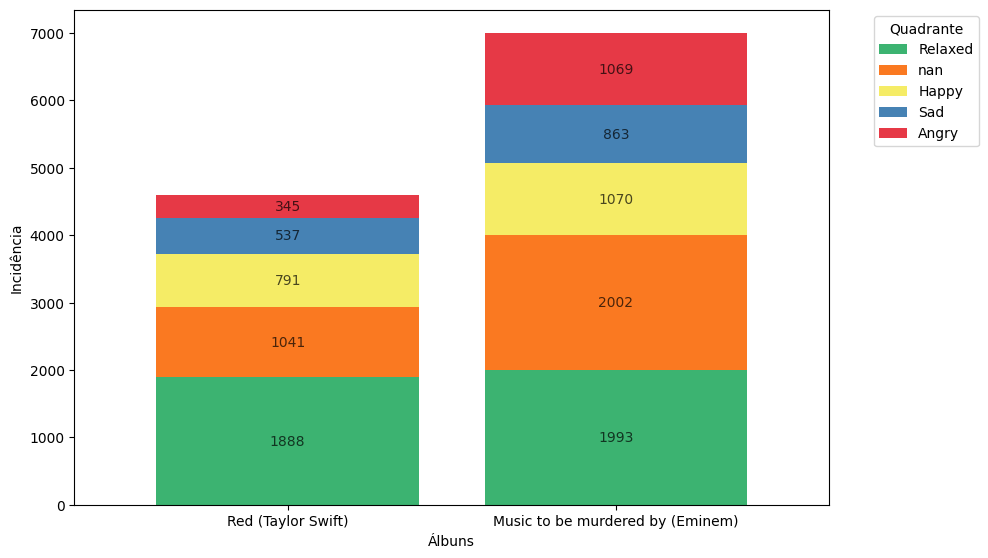

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataframes = [red_token, borntobe_token]
nomes_dataframes = ["Red (Taylor Swift)", "Music to be murdered by (Eminem)"]
incidences = []

for nome, df in zip(nomes_dataframes, dataframes):
    incidence = df['Quadrant'].value_counts(dropna=False)
    incidence = incidence.rename(nome)
    incidences.append(incidence)

result = pd.concat(incidences, axis=1)

if pd.NA in result.columns:
    cols = list(result.columns)
    cols.remove(pd.NA)
    cols.append(pd.NA)
    result = result[cols]

result = result.fillna(0).astype(int)

legend_colors = ['mediumseagreen', '#FA7921', '#F5EC66', 'steelblue', '#E63946']


ax = result.T.plot(kind='bar', stacked=True, width=0.8, color=legend_colors)

# Ajustar os ticks do eixo x para controlar o espaçamento entre as barras
ticks_positions = [i for i in range(len(result.columns))]
plt.xticks(ticks_positions, result.columns)

plt.xlabel('Álbuns')
plt.ylabel('Incidência')
# plt.title('Incidência dos Quadrantes nos Álbuns')

plt.legend(title='Quadrante',  bbox_to_anchor=(1.05, 1), loc='upper left', labels=result.index)

# Adicionar os números de incidência mais centralizados dentro das barras
for bar in ax.containers:
    ax.bar_label(bar, label_type='center', padding=0, alpha=0.7)

plt.rcParams['figure.figsize'] = (10, 8)
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig('comparacao_album_diferen.png')
plt.show()



In [ ]:
red_token

,Sentence ID,Album Name,Track Title,Sentence,Valence,Arousal,Dominance,Quadrant,Sentiment,# Words Found,Found Words,All Words
0,1,red (taylor version),State Of Grace,walk,0.643,0.412,0.450,Relaxed,serene,1,['walk'],['walk']
1,2,red (taylor version),State Of Grace,fast,NaN,NaN,NaN,NaN,NaN,0,NaN,['fast']
2,3,red (taylor version),State Of Grace,traffic,0.323,0.559,0.518,Angry,stressed,1,['traffic'],['traffic']
3,4,red (taylor version),State Of Grace,light,0.771,0.320,0.519,Relaxed,serene,1,['light'],['light']
4,5,red (taylor version),State Of Grace,busy,0.402,0.500,0.474,Angry,stressed,1,['busy'],['busy']
...,...,...,...,...,...,...,...,...,...,...,...,...
4597,4598,red (taylor version),The Very First Night,away,NaN,NaN,NaN,NaN,NaN,0,NaN,['away']
4598,4599,red (taylor version),The Very First Night,take,0.828,0.537,0.348,Happy,happy,1,['take'],['take']
4599,4600,red (taylor version),The Very First Night,away,NaN,NaN,NaN,NaN,NaN,0,NaN,['away']
4600,4601,red (taylor version),The Very First Night,take,0.828,0.537,0.348,Happy,happy,1,['take'],['take']


In [ ]:
taylor_count_copy = taylor_count.drop(columns=['n/a'], errors='ignore').copy()

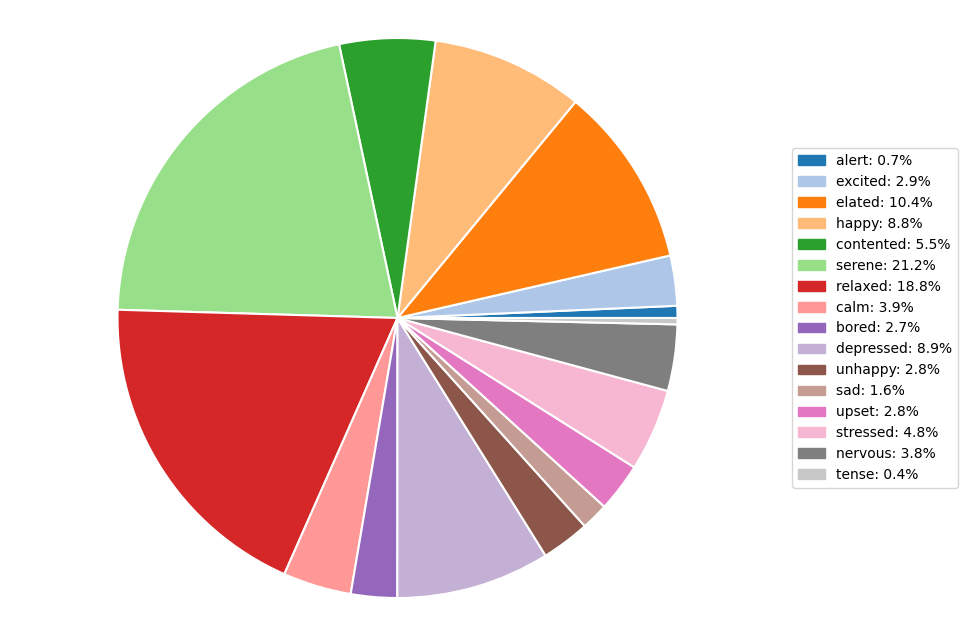

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_columns = taylor_count_copy.drop(columns=['id', 'album_name', 'number_lines'], errors='ignore')


total_sentiments = sentiment_columns.sum()


percentages = (total_sentiments / total_sentiments.sum()) * 100
explode = [0.1 if sentiment == 'Happy' else 0 for sentiment in percentages.index]


plt.figure(figsize=(10, 8))
pie_chart = plt.pie(percentages, colors=plt.cm.tab20.colors, wedgeprops={"linewidth": 1.5, "edgecolor": "white"})

# plt.title('Porcentagem de Sentimentos nos Álbuns da Taylor Swift')


plt.axis('equal')


handles = [plt.Rectangle((0,0),1,1, color=color) for color in plt.cm.tab20.colors]
labels = [f'{label}: {value:.1f}%' for label, value in zip(percentages.index, percentages)]


plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.rcParams['figure.figsize'] = (12, 10)
plt.savefig('porcentagem_total_albuns_taylor.png')
plt.show()


In [ ]:
 points = {
        "alert": '#7FFF7F', "excited": '#7F7FFF', "elated": '#4CB944', "happy": '#FFDF64',
        "contented": '#FFBF7F', "serene": '#957186', "relaxed": '#46ACC2', "calm": '#7FFFBD',
        "bored": '#FF7F7F', "depressed": '#545F66', "unhappy": '#FF6347', "sad": '#BEBEBE',
        "upset": '#556B2F', "stressed": '#008080', "nervous": '#668cff', "tense": '#800000'
    }

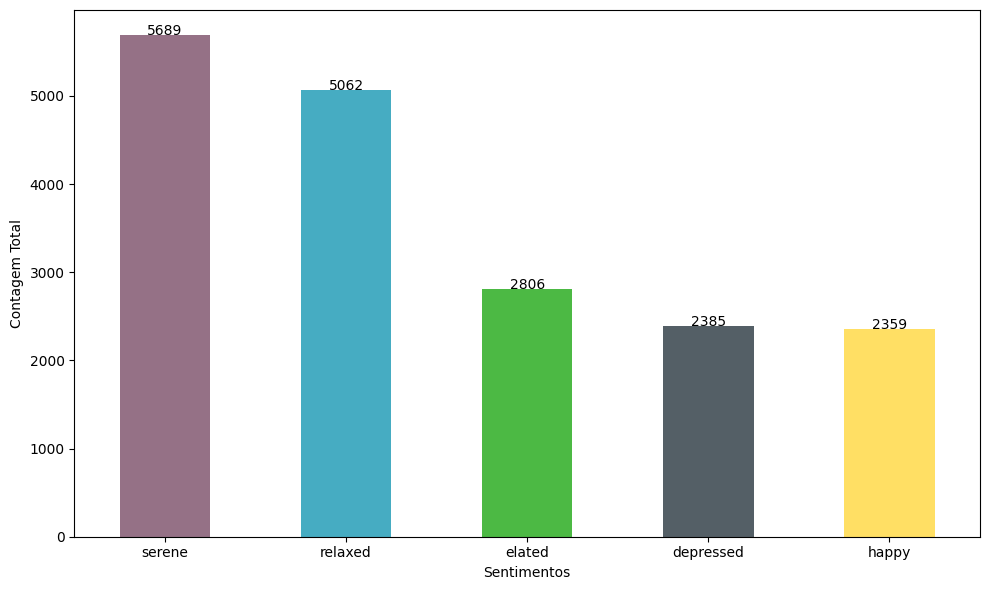

In [ ]:
colors = ['#957186', '#46ACC2', '#4CB944', '#545F66', '#FFDF64']
sentiment_columns = taylor_count.drop(columns=['id', 'album_name', 'number_lines'], errors='ignore')
total_sentiments = sentiment_columns.drop(columns=['n/a'], errors='ignore').sum()
top_sentiments = total_sentiments.nlargest(5)
plt.figure(figsize=(10, 6))
top_sentiments.plot(kind='bar', color=colors)
for i, value in enumerate(top_sentiments):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.xlabel('Sentimentos')
plt.ylabel('Contagem Total')
# plt.title('Cinco Sentimentos Mais Frequentes nos Álbuns da Taylor Swift')
plt.xticks(rotation=0)
# plt.grid(axis='y')
plt.tight_layout()

# Salvar o gráfico como PNG
plt.savefig('cinco_sentimentos_mais_frequentes.png')

plt.show()


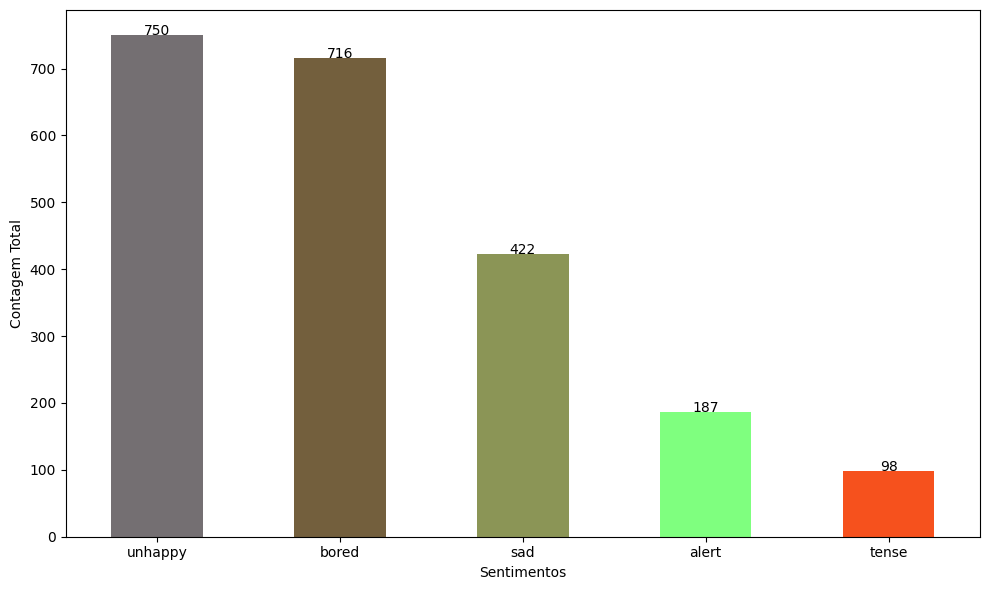

In [ ]:
colors = ['#746F72', '#735F3D', '#8B9556', '#7FFF7F', '#F6511D']

sentiment_columns = taylor_count.drop(columns=['id', 'album_name', 'number_lines'], errors='ignore')
total_sentiments = sentiment_columns.drop(columns=['n/a'], errors='ignore').sum()
bottom_sentiments = total_sentiments.nsmallest(5)

bottom_sentiments = bottom_sentiments.sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bottom_sentiments.plot(kind='bar', color=colors)

# Adicionar os valores exatos acima de cada barra
for i, value in enumerate(bottom_sentiments):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.xlabel('Sentimentos')
plt.ylabel('Contagem Total')
# plt.title('Cinco Sentimentos Menos Frequentes nos Álbuns da Taylor Swift')
plt.xticks(rotation=0)
# plt.grid(axis='y')
plt.tight_layout()
plt.savefig('cinco_sentimentos_menos_frequentes.png')
plt.show()
